#Brain Tumor Detection in Magnetic Resonance Images Using Finetuned EfficientNet
- Brain tumors are a serious medical concern, caused by the abnormal growth of cells in the brain. Diagnosing them can be incredibly challenging, not just because they are rare, but also because they come in so many different forms. Typically, doctors rely on Magnetic Resonance Imaging (MRI) to locate and analyze these tumors, but the traditional process is time-consuming, complicated, and prone to errors when done manually.


- This is where artificial intelligence (AI) steps in to make a difference. In this study, we use deep learning, specifically a fine-tuned EfficientNet-B0 model, to improve the accuracy and efficiency of detecting brain tumors in MRI scans. By applying image enhancement techniques and data augmentation, we aim to ensure the model can work with high-quality data and deliver reliable results. The findings show that this AI-powered approach can significantly streamline the detection process while maintaining high levels of accuracy.

-----------------------------------------------------



In [18]:
import os
import pandas as pd
import shutil
import kagglehub

# Step 1: Download dataset using kagglehub
path = kagglehub.dataset_download("jakeshbohaju/brain-tumor")

# Step 2: Define dataset paths
dataset_path = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor/Brain Tumor"
csv_path = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor.csv"
tumor_path = os.path.join(dataset_path, "Tumor")  # Folder for Tumor images
no_tumor_path = os.path.join(dataset_path, "No_Tumor")  # Folder for No_Tumor images

# Step 3: Create classification folders
os.makedirs(tumor_path, exist_ok=True)
os.makedirs(no_tumor_path, exist_ok=True)

# Step 4: Read the CSV file
df = pd.read_csv(csv_path)

# Step 5: Move images based on classification
missing_files = []  # To track missing files
for _, row in df.iterrows():
    image_name = row['Image'] + ".jpg"  # Ensure image extension is added
    image_class = row['Class']  # 0 = No Tumor, 1 = Tumor

    # Define source and destination paths
    src = os.path.join(dataset_path, image_name)
    dst_folder = tumor_path if image_class == 1 else no_tumor_path
    dst = os.path.join(dst_folder, image_name)

    # Move the image if it exists
    if os.path.exists(src):
        shutil.move(src, dst)
    else:
        missing_files.append(image_name)

# Step 6: Display contents of Tumor and No_Tumor folders
def display_folder_contents(folder_path, folder_name):
    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        print(f"\nContents of {folder_name} folder:")
        print(f"Number of images: {len(files)}")
        print(f"First 10 images: {files[:10]}")
    else:
        print(f"{folder_name} folder does not exist.")

display_folder_contents(tumor_path, "Tumor")
display_folder_contents(no_tumor_path, "No_Tumor")

# Step 7: Log missing files, if any
if missing_files:
    print("\nMissing files:")
    print(missing_files)
else:
    print("\nAll files moved successfully!")


Contents of Tumor folder:
Number of images: 1683
First 10 images: ['Image3297.jpg', 'Image2099.jpg', 'Image1460.jpg', 'Image3116.jpg', 'Image3720.jpg', 'Image1481.jpg', 'Image2724.jpg', 'Image3308.jpg', 'Image3049.jpg', 'Image2467.jpg']

Contents of No_Tumor folder:
Number of images: 2079
First 10 images: ['Image1043.jpg', 'Image1499.jpg', 'Image2740.jpg', 'Image1605.jpg', 'Image2521.jpg', 'Image84.jpg', 'Image2395.jpg', 'Image1735.jpg', 'Image1106.jpg', 'Image2194.jpg']

Missing files:
['Image1.jpg', 'Image2.jpg', 'Image3.jpg', 'Image4.jpg', 'Image5.jpg', 'Image6.jpg', 'Image7.jpg', 'Image8.jpg', 'Image9.jpg', 'Image10.jpg', 'Image11.jpg', 'Image12.jpg', 'Image13.jpg', 'Image14.jpg', 'Image15.jpg', 'Image16.jpg', 'Image17.jpg', 'Image18.jpg', 'Image19.jpg', 'Image20.jpg', 'Image21.jpg', 'Image22.jpg', 'Image23.jpg', 'Image24.jpg', 'Image25.jpg', 'Image26.jpg', 'Image27.jpg', 'Image28.jpg', 'Image29.jpg', 'Image30.jpg', 'Image31.jpg', 'Image32.jpg', 'Image33.jpg', 'Image34.jpg', 'Imag

In [19]:
tumor_path

'/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor/Brain Tumor/Tumor'

In [20]:
no_tumor_path

'/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor/Brain Tumor/No_Tumor'

In [21]:
# csv path dataframe
df

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


Displaying 5 images from Tumor folder:


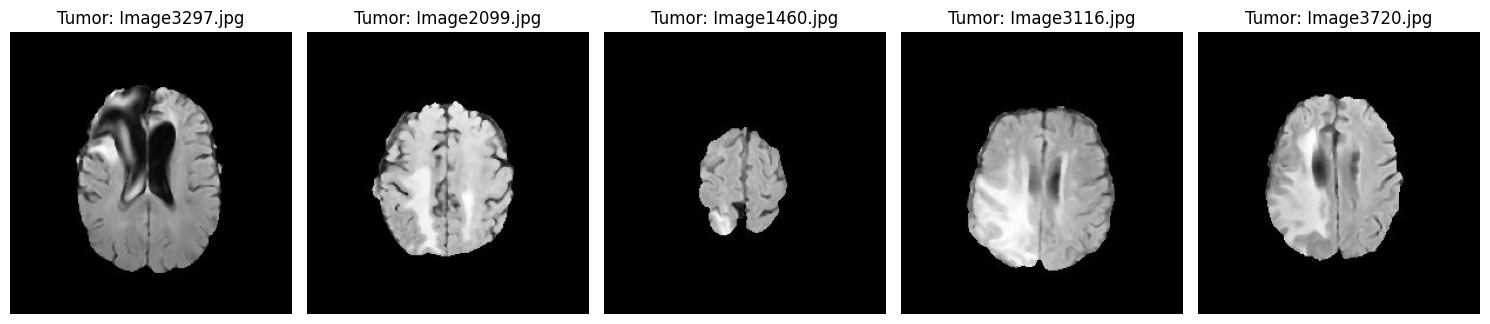

Displaying 5 images from No_Tumor folder:


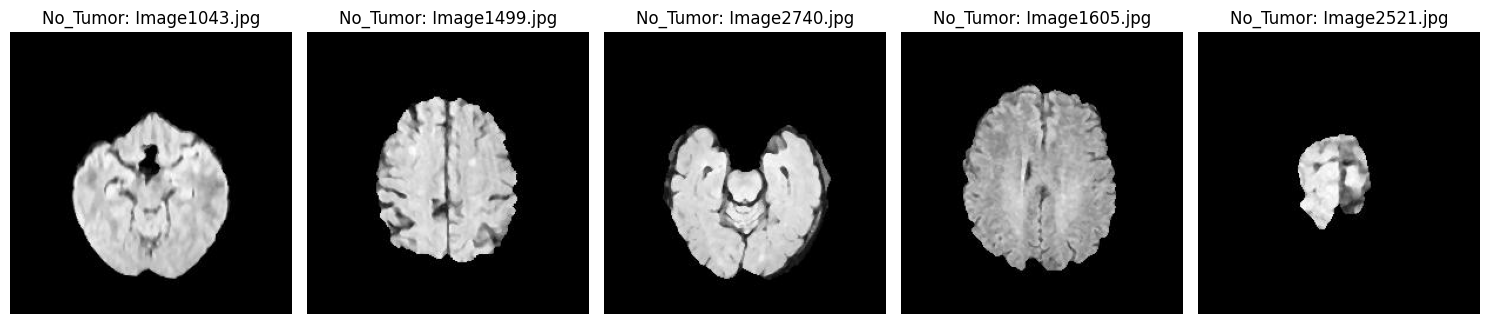

In [22]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img

# Function to display images from a folder
def display_images_from_folder(folder_path, folder_name, num_images=5):

    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        if len(files) == 0:
            print(f"No images found in {folder_name} folder.")
            return
        print(f"Displaying {min(num_images, len(files))} images from {folder_name} folder:")
        plt.figure(figsize=(15, 5))
        for i, file in enumerate(files[:num_images]):
            image_path = os.path.join(folder_path, file)
            img = load_img(image_path)  # Load the image
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(f"{folder_name}: {file}")
            plt.axis("off")
        plt.tight_layout()
        plt.show()
    else:
        print(f"{folder_name} folder does not exist.")

# Display images from Tumor and No_Tumor folders
display_images_from_folder(tumor_path, "Tumor", num_images=5)
display_images_from_folder(no_tumor_path, "No_Tumor", num_images=5)

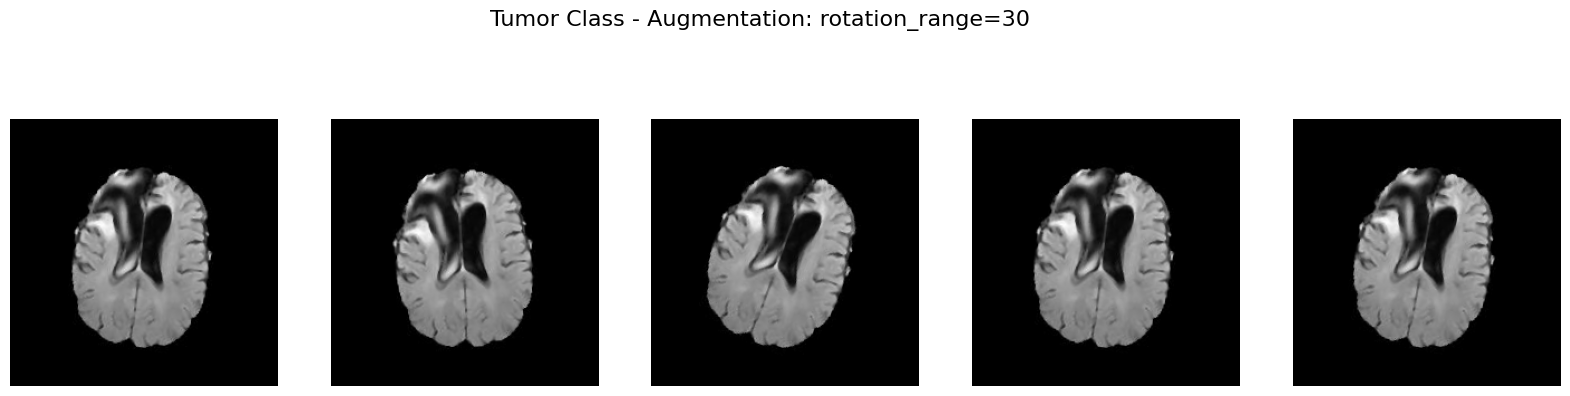

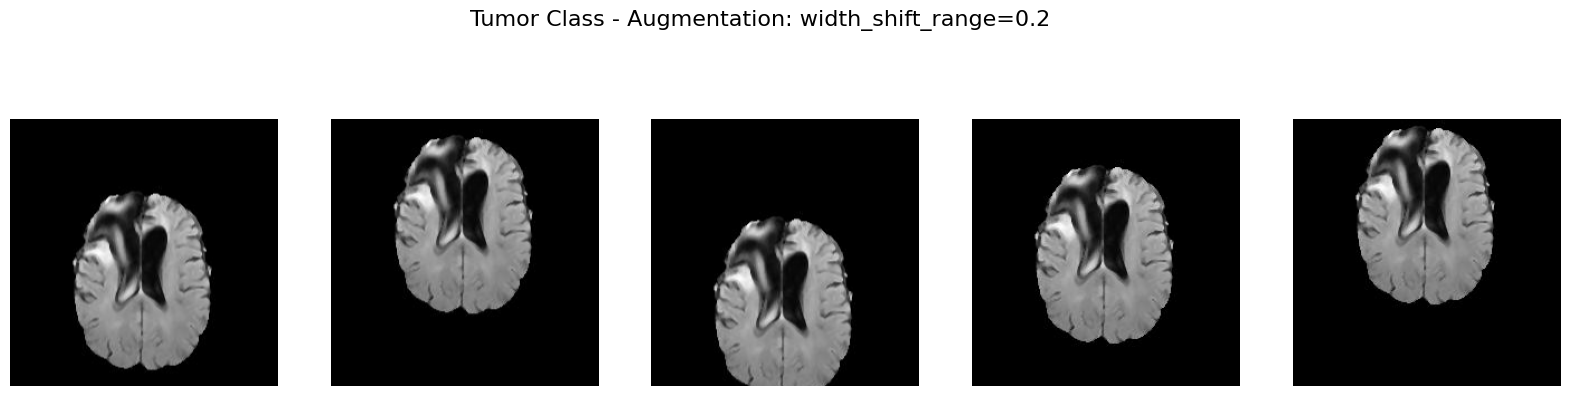

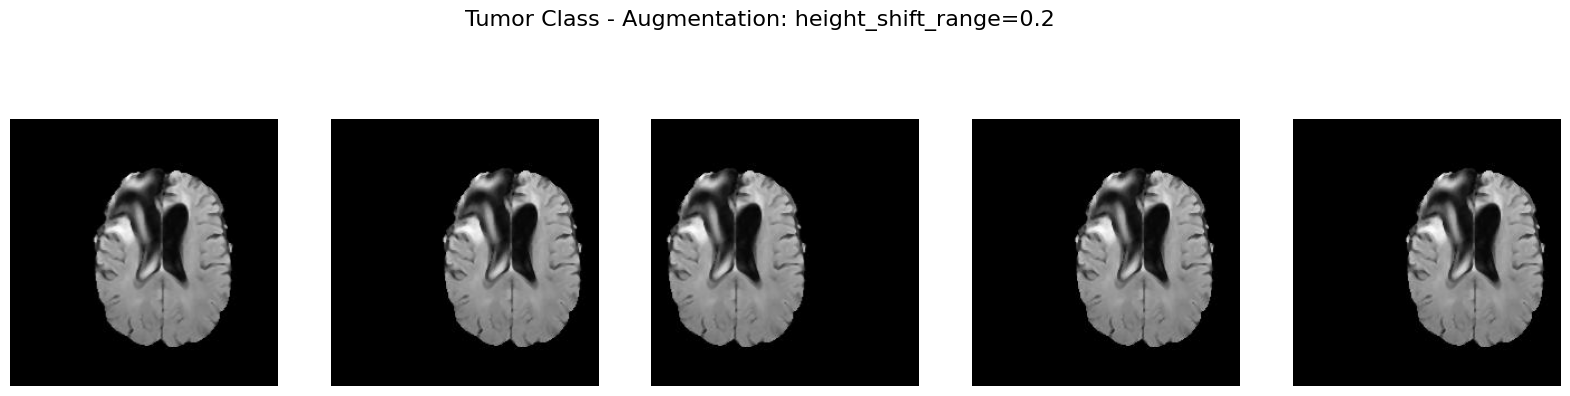

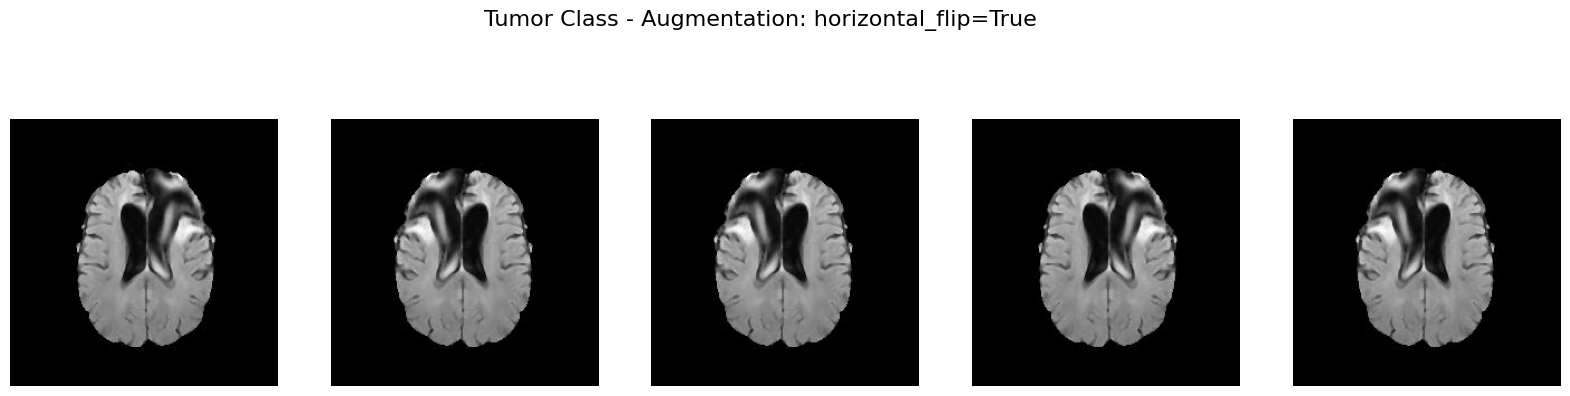

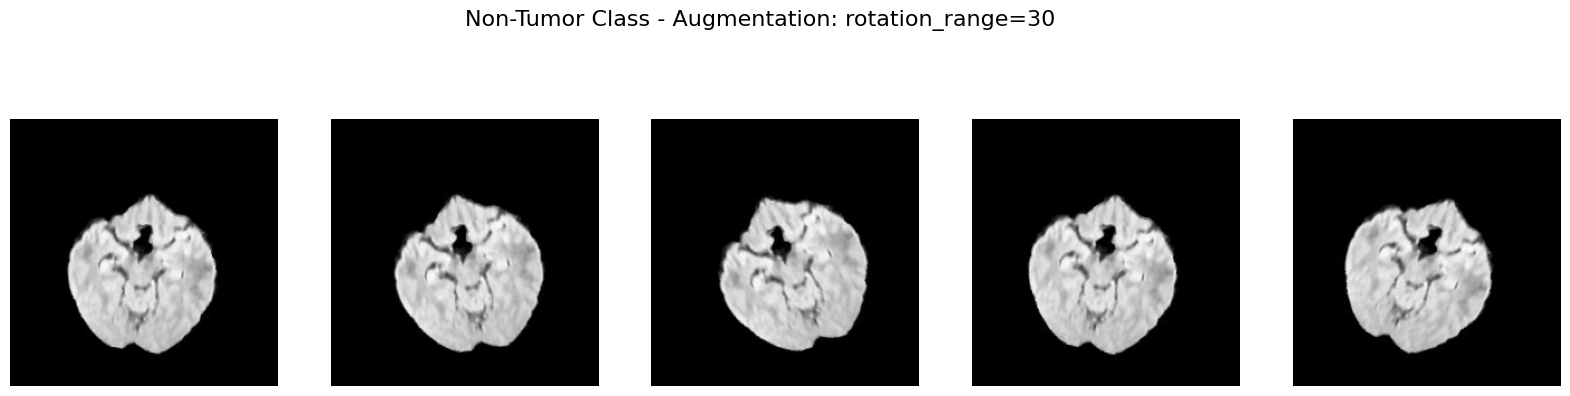

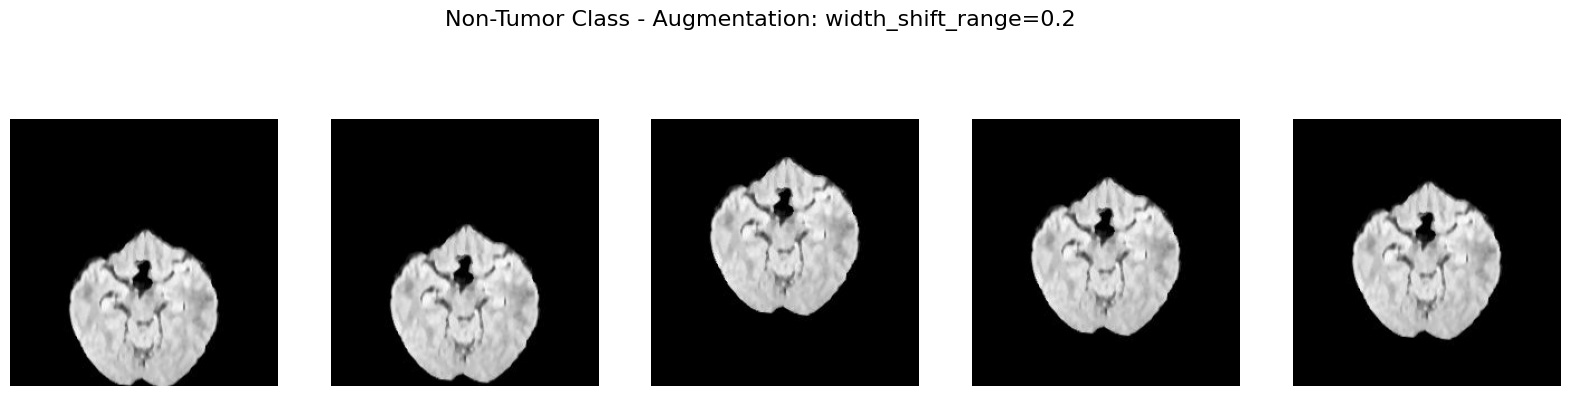

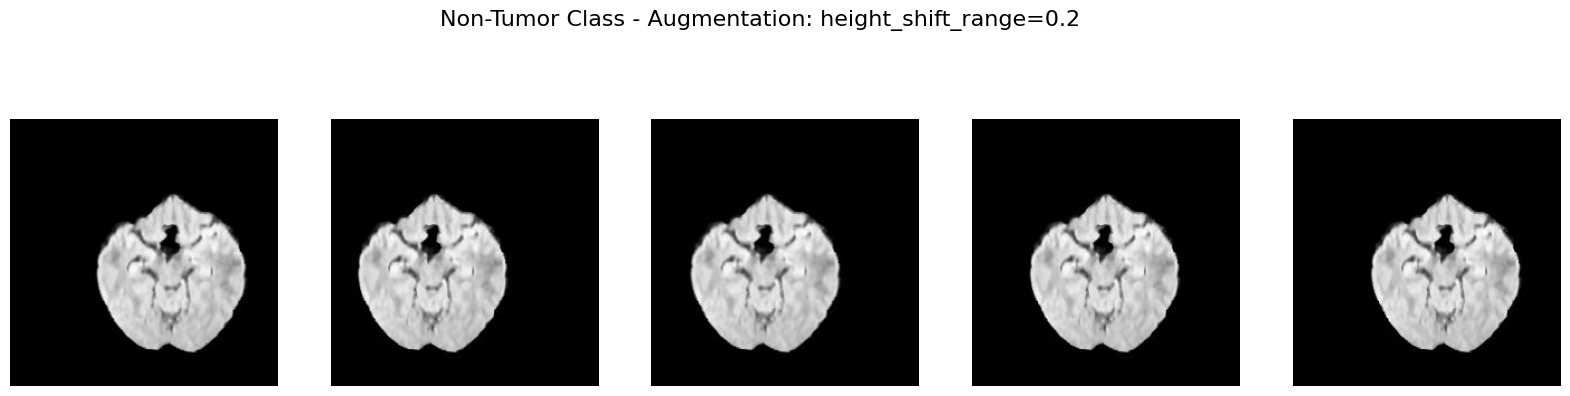

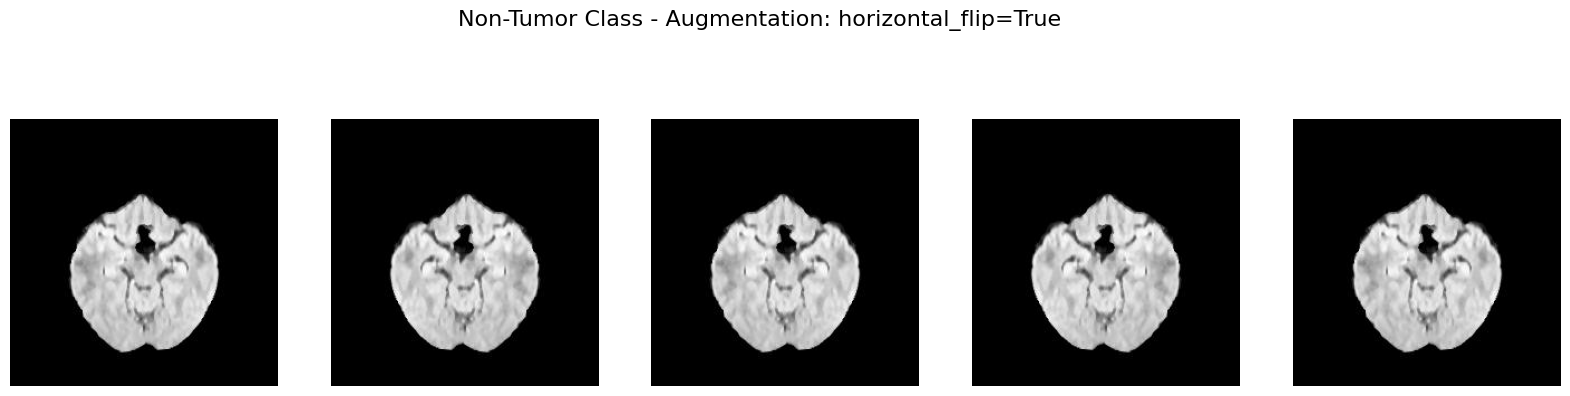

In [23]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Paths to the tumor and non-tumor folders
tumor_path = '/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor/Brain Tumor/Tumor'
non_tumor_path = '/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor/Brain Tumor/No_Tumor'

# List files in the folders
tumor_files = os.listdir(tumor_path)
non_tumor_files = os.listdir(non_tumor_path)

# Select a sample image from each class
tumor_image = os.path.join(tumor_path, tumor_files[0])  # First tumor image
non_tumor_image = os.path.join(non_tumor_path, non_tumor_files[0])  # First non-tumor image

# Function to visualize augmented images
def visualize_augmentations(image_path, title, augmentations, num_images=5):
    datagen = ImageDataGenerator(**augmentations)
    img = load_img(image_path)  # Load the image
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for generator

    # Generate and plot augmented images
    fig, ax = plt.subplots(1, num_images, figsize=(20, 5))
    fig.suptitle(title, fontsize=16)

    for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
        ax[i].imshow(batch[0].astype('uint8'))
        ax[i].axis('off')
        if i >= num_images - 1:
            break
    plt.show()

# Define augmentations for the tumor and non-tumor classes
augmentations = [
    {'rotation_range': 30},
    {'width_shift_range': 0.2},
    {'height_shift_range': 0.2},
    {'horizontal_flip': True},
]

# Visualize augmented images for Tumor
for aug in augmentations:
    visualize_augmentations(tumor_image, f"Tumor Class - Augmentation: {list(aug.keys())[0]}={list(aug.values())[0]}", aug)

# Visualize augmented images for Non-Tumor
for aug in augmentations:
    visualize_augmentations(non_tumor_image, f"Non-Tumor Class - Augmentation: {list(aug.keys())[0]}={list(aug.values())[0]}", aug)


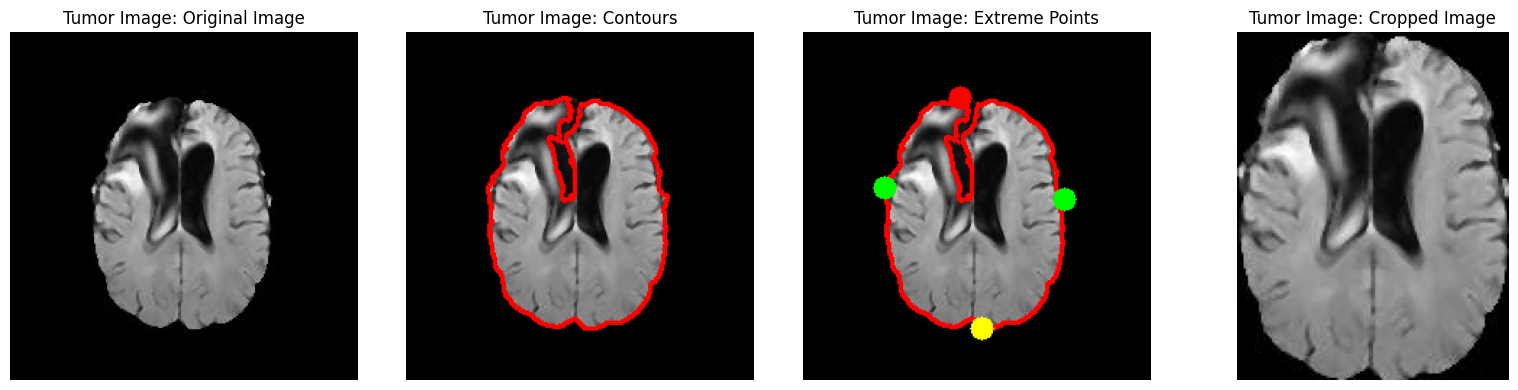

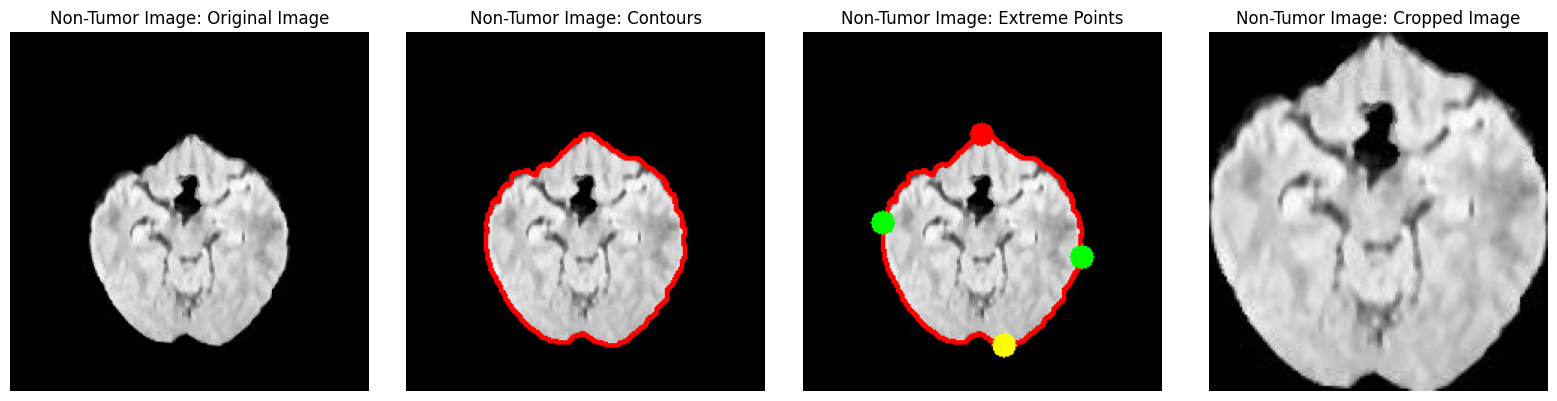

In [25]:
import cv2

# Function to process image and extract contours, extreme points, and cropped regions
def process_image(image_path):

    # Step 1: we read the original image
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original_image is None:
        print(f"Image not found: {image_path}")
        return None, None, None, None

    # Step 2: Thresholding to create binary image
    _, binary_image = cv2.threshold(original_image, 30, 255, cv2.THRESH_BINARY)

    # Step 3: Find image contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)  # Draw in red

    # Step 4: Find extreme points if contours are detected (coloured point)
    if len(contours) > 0:
        largest_contour = max(contours, key=cv2.contourArea)
        left = tuple(largest_contour[largest_contour[:, :, 0].argmin()][0])
        right = tuple(largest_contour[largest_contour[:, :, 0].argmax()][0])
        top = tuple(largest_contour[largest_contour[:, :, 1].argmin()][0])
        bottom = tuple(largest_contour[largest_contour[:, :, 1].argmax()][0])

        # Mark extreme points
        extreme_image = contour_image.copy()
        cv2.circle(extreme_image, left, 8, (0, 255, 0), -1)  # Green
        cv2.circle(extreme_image, right, 8, (0, 255, 0), -1)  # Green
        cv2.circle(extreme_image, top, 8, (255, 0, 0), -1)  # Blue
        cv2.circle(extreme_image, bottom, 8, (255, 255, 0), -1)  # Yellow

        # Step 5: Crop the image
        cropped_image = original_image[top[1]:bottom[1], left[0]:right[0]]
    else:
        extreme_image = contour_image.copy()
        cropped_image = original_image  # Return original if no contours

    return original_image, contour_image, extreme_image, cropped_image

# Function to visualize the process
def visualize_process(image_path, title_prefix):
    original, contours, extremes, cropped = process_image(image_path)
    if original is None:
        return  # Skip visualization for missing images

    # Display the steps
    titles = [
        f"{title_prefix}: Original Image",
        f"{title_prefix}: Contours",
        f"{title_prefix}: Extreme Points",
        f"{title_prefix}: Cropped Image"
    ]
    images = [original, contours, extremes, cropped]

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Define paths for tumor and non-tumor images
tumor_image_path = '/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor/Brain Tumor/Tumor/Image3297.jpg'
non_tumor_image_path = '/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor/Brain Tumor/No_Tumor/Image1043.jpg'

# Visualize tumor image
visualize_process(tumor_image_path, "Tumor Image")

# Visualize non-tumor image
visualize_process(non_tumor_image_path, "Non-Tumor Image")


In [31]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch
import torch.nn as nn
from torchvision import models

# =========================
# 1. Data Preparation
# =========================

# Basic transformations for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),  # Convert images to Tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize images
])

# Load the dataset from the folders
# Replace '/path/to/data' with the actual dataset path (dataset_path)
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split the dataset into training, validation, and testing (80-10-10)
train_ratio = 0.8  # 80% for training
val_ratio = 0.1    # 10% for validation
test_ratio = 0.1   # 10% for testing

train_size = int(train_ratio * len(dataset))
val_size = int(val_ratio * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Prepare DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [34]:
# =========================
# 2. Model Preparation
# =========================

# Load pre-trained EfficientNet-B0
model = models.efficientnet_b0(pretrained=True)

# Modify the final layers to align with the paper
model.classifier = nn.Sequential(
    nn.Dropout(p=0.2),  # Default EfficientNet dropout
    nn.Linear(in_features=1280, out_features=512),  # Add dense layer with 512 units
    nn.ReLU(),  # Activation for the dense layer
    nn.Dropout(p=0.2),  # Dropout for better regularization
    nn.Linear(in_features=512, out_features=1),  # Final binary classification layer
    nn.Sigmoid()  # Activation function for binary output
)

# Send the model to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [35]:
# Initialize lists to store metrics
train_losses = []
val_losses = []
val_accuracies = []

# Update  training and validation loops to populate these lists
for epoch in range(epochs_phase_1 + epochs_phase_2):  # Combined epochs
    # Training metrics (collect running_loss)
    train_losses.append(running_loss / len(train_loader))

    # Validation metrics (collect val_loss and val_accuracy)
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct / total)


In [36]:
# =========================
# 3. Training and Validation Setup
# =========================

# Define loss function
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

# Phase 1: Train only the classifier layers
for param in model.features.parameters():
    param.requires_grad = False  # Freeze base model layers

optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.001)  # Higher learning rate for new layers
epochs_phase_1 = 10  # Adjust epochs for phase 1

print("Phase 1: Training Classifier Layers Only")
for epoch in range(epochs_phase_1):
    # Training loop
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch+1}/{epochs_phase_1}, "
          f"Train Loss: {running_loss/len(train_loader):.4f}, "
          f"Validation Loss: {val_loss/len(val_loader):.4f}, "
          f"Validation Accuracy: {100 * correct / total:.2f}%")

# Phase 2: Fine-tune the entire model
for param in model.features.parameters():
    param.requires_grad = True  # Unfreeze base model layers

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Lower learning rate for fine-tuning
epochs_phase_2 = 10  # Adjust epochs for phase 2

print("Phase 2: Fine-Tuning Entire Model")
for epoch in range(epochs_phase_2):
    # Training loop
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch+1}/{epochs_phase_2}, "
          f"Train Loss: {running_loss/len(train_loader):.4f}, "
          f"Validation Loss: {val_loss/len(val_loader):.4f}, "
          f"Validation Accuracy: {100 * correct / total:.2f}%")


Phase 1: Training Classifier Layers Only
Epoch 1/10, Train Loss: 0.3264, Validation Loss: 0.1803, Validation Accuracy: 92.82%
Epoch 2/10, Train Loss: 0.2538, Validation Loss: 0.1621, Validation Accuracy: 93.09%
Epoch 3/10, Train Loss: 0.2330, Validation Loss: 0.1835, Validation Accuracy: 92.82%
Epoch 4/10, Train Loss: 0.2084, Validation Loss: 0.1366, Validation Accuracy: 94.41%
Epoch 5/10, Train Loss: 0.2224, Validation Loss: 0.1743, Validation Accuracy: 93.88%
Epoch 6/10, Train Loss: 0.1933, Validation Loss: 0.1234, Validation Accuracy: 94.68%
Epoch 7/10, Train Loss: 0.1795, Validation Loss: 0.1187, Validation Accuracy: 95.21%
Epoch 8/10, Train Loss: 0.1570, Validation Loss: 0.1387, Validation Accuracy: 95.48%
Epoch 9/10, Train Loss: 0.1749, Validation Loss: 0.1311, Validation Accuracy: 94.68%
Epoch 10/10, Train Loss: 0.1464, Validation Loss: 0.1235, Validation Accuracy: 95.21%
Phase 2: Fine-Tuning Entire Model
Epoch 1/10, Train Loss: 0.1278, Validation Loss: 0.1527, Validation Accura

In [37]:
# =========================
# 4. Testing Setup
# =========================

# Set the model to evaluation mode
model.eval()

# Initialize variables to track test loss and accuracy
test_loss = 0.0
correct = 0
total = 0

# Testing loop
with torch.no_grad():
    for inputs, labels in test_loader:  # Assuming you have a test_loader defined
        inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Calculate predictions
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate average test loss and accuracy
average_test_loss = test_loss / len(test_loader)
test_accuracy = 100 * correct / total

print(f"Test Loss: {average_test_loss:.4f}, "
      f"Test Accuracy: {test_accuracy:.2f}%")



Test Loss: 0.0896, Test Accuracy: 98.67%


#Done , thank you

---------------------------------------------------------